# ¡Hola Isaac! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**


--------------

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Isaac completaste todas las tareas propuestas para el proyecto de manera sobresaliente. Demostraste un excelente manejo de las herramientas de visualización de datos y un buen dominio en la prueba de hipótesis, lo cual fortalece el análisis de los datos con los que has trabajado. Continúa desarrollando estas habilidades, ya que serán claves en futuros proyectos.

Éxitos en tu próximo sprint 🚀

*Estado del Proyecto:* **Aprobado**

</div>

--------------

Paso 4. Análisis exploratorio de datos (Python)

In [2]:

# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

# Cargar los datasets
try:
    df_trips = pd.read_csv('/datasets/project_sql_result_01.csv')
    df_neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')
    df_loop_ohare_trips = pd.read_csv('/datasets/project_sql_result_07.csv')
except FileNotFoundError:
    print("Error: Asegúrate de que los archivos CSV estén en la ubicación correcta.")

print("Archivos cargados exitosamente.")

Archivos cargados exitosamente.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen idea usar un bloque `try-except` para validar la ubicación de los datasets

</div>

Estudiar los datos y asegurar los tipos de datos

In [3]:
# Analizar df_trips
print("--- DataFrame df_trips ---")
print(df_trips.info())
print("\nPrimeras 5 filas de df_trips:")
print(df_trips.head())
print("\nValores nulos en df_trips:")
print(df_trips.isnull().sum())

# Analizar df_neighborhoods
print("\n--- DataFrame df_neighborhoods ---")
print(df_neighborhoods.info())
print("\nPrimeras 5 filas de df_neighborhoods:")
print(df_neighborhoods.head())
print("\nValores nulos en df_neighborhoods:")
print(df_neighborhoods.isnull().sum())

# Analizar df_loop_ohare_trips
print("\n--- DataFrame df_loop_ohare_trips ---")
print(df_loop_ohare_trips.info())
print("\nPrimeras 5 filas de df_loop_ohare_trips:")
print(df_loop_ohare_trips.head())
print("\nValores nulos en df_loop_ohare_trips:")
print(df_loop_ohare_trips.isnull().sum())

# Conversión de tipos de datos

df_loop_ohare_trips['start_ts'] = pd.to_datetime(df_loop_ohare_trips['start_ts'])
print("\n--- Conversión de tipos de datos completada ---")
print(df_loop_ohare_trips.info())

--- DataFrame df_trips ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None

Primeras 5 filas de df_trips:
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

Valores nulos en df_trips:
company_name    0
trips_amount    0
dtype: int64

--- DataFrame df_neighborhoods ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0  

Análisis de los datos:
df_trips: No contiene valores nulos. company_name y trips_amount tienen tipos de datos correctos (object e int64).

df_neighborhoods: No contiene valores nulos. dropoff_location_name y average_trips tienen tipos de datos correctos.

df_loop_ohare_trips: No tiene valores nulos. La columna start_ts es de tipo object (cadena de texto), por lo que la convertimos al tipo datetime para facilitar el análisis de fecha y hora.


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo importando las librerías y los datos del proyecto. Adicionalmente usaste correctamente las funciones `info` y `head`, esto te permite hacer una primera revisión de los datos, su estructura y contenido.

Además hiciste un buen trabajo comprobando la presencia de datos faltantes, esto es clave para verificar la integridad del dataset y evitar sesgos o errores al momento de analizar los datos


</div>

Identificar los 10 barrios principales
Basado en el average_trips, vamos a identificar los 10 barrios principales en términos de finalización de recorridos.



In [4]:
# Ordenar el DataFrame y seleccionar los 10 principales
top_10_neighborhoods = df_neighborhoods.sort_values(by='average_trips', ascending=False).head(10)

print("Los 10 barrios principales por promedio de viajes:")
print(top_10_neighborhoods)

Los 10 barrios principales por promedio de viajes:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


Crear gráficos y sacar conclusiones
Visualizar los datos nos ayudará a entender mejor los patrones y las tendencias.

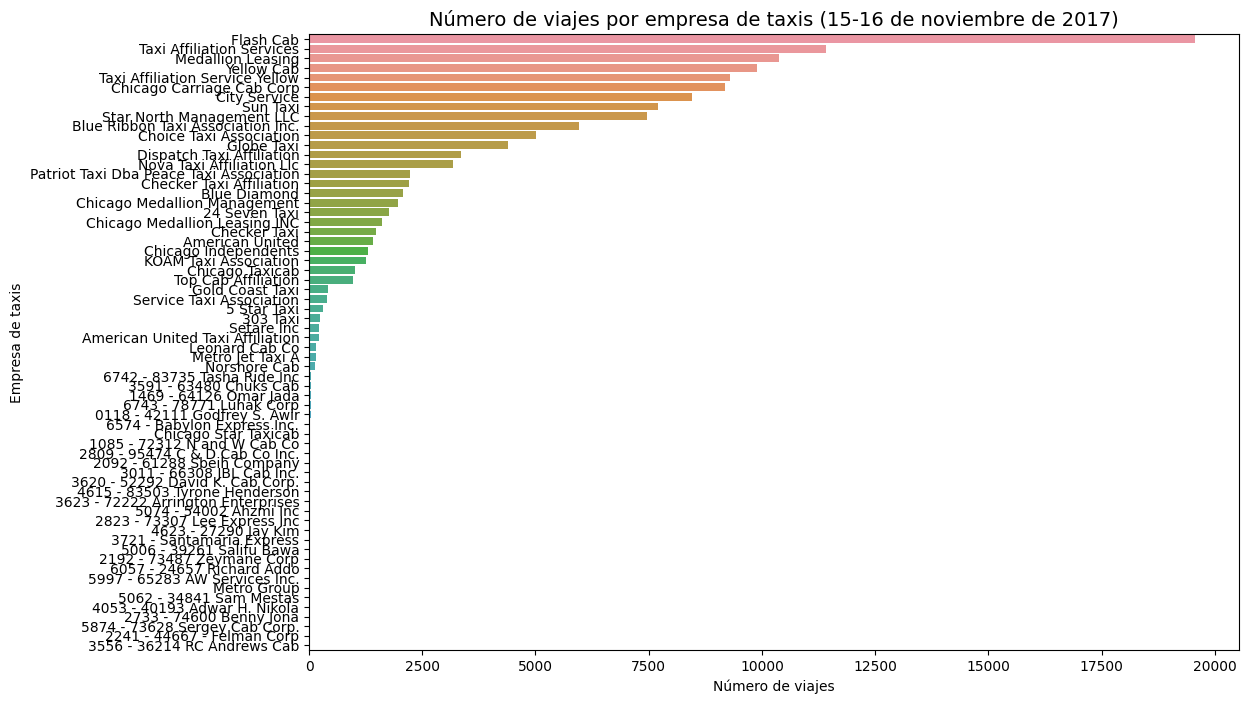

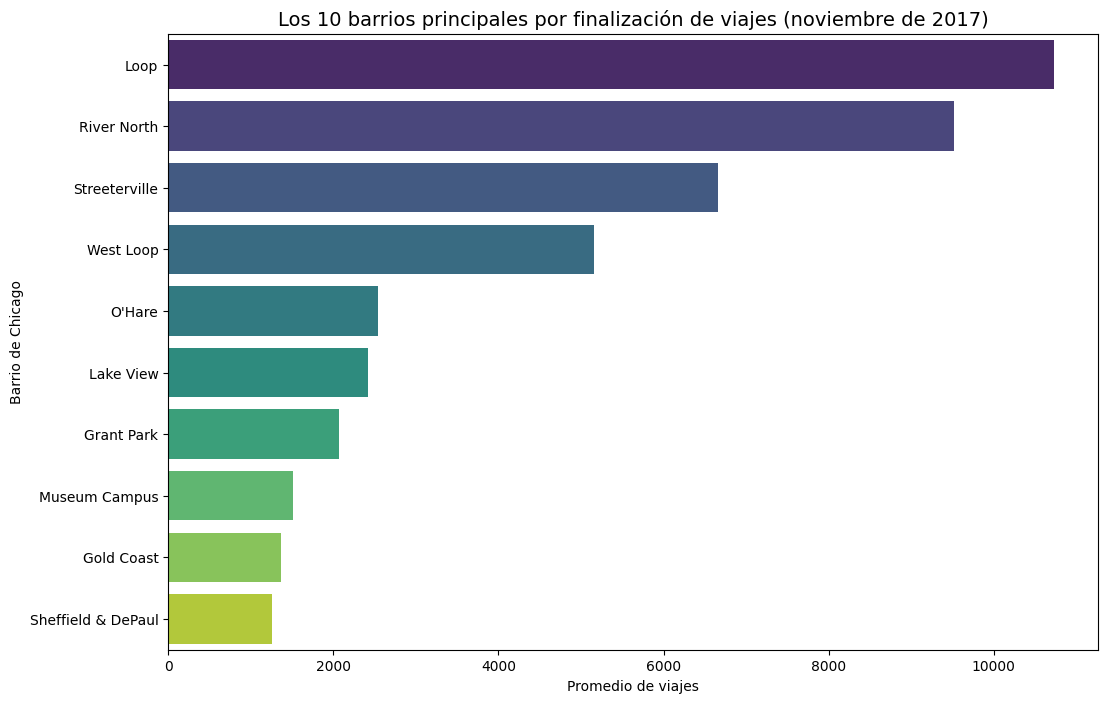

In [5]:
# Gráfico 1: Empresas de taxis y número de viajes
plt.figure(figsize=(12, 8))
sns.barplot(data=df_trips, x='trips_amount', y='company_name')
plt.title('Número de viajes por empresa de taxis (15-16 de noviembre de 2017)', fontsize=14)
plt.xlabel('Número de viajes')
plt.ylabel('Empresa de taxis')
plt.show()

# Conclusión del Gráfico 1:
# El gráfico muestra una gran disparidad en el número de viajes entre las compañías.
# "Flash Cab" y "Taxi Affiliation Services" tienen un número significativamente mayor de viajes que el resto, lo que indica que son las empresas líderes en el mercado de taxis de Chicago.
# La mayoría de las otras compañías tienen un número de viajes mucho más bajo, lo que sugiere que el mercado podría estar concentrado en unos pocos actores principales.

# Gráfico 2: Los 10 barrios principales por número de finalizaciones de viajes
plt.figure(figsize=(12, 8))
sns.barplot(data=top_10_neighborhoods, x='average_trips', y='dropoff_location_name', palette='viridis')
plt.title('Los 10 barrios principales por finalización de viajes (noviembre de 2017)', fontsize=14)
plt.xlabel('Promedio de viajes')
plt.ylabel('Barrio de Chicago')
plt.show()



Análisis del gráfico de empresas de taxis
El gráfico que muestra el número de viajes por empresa de taxis revela una clara concentración del mercado. Hay una disparidad significativa en el número de viajes entre las compañías. Flash Cab y Taxi Affiliation Services dominan el mercado con una cantidad de viajes notablemente superior al resto. Esto sugiere que estas dos empresas son líderes indiscutibles en Chicago, mientras que la mayoría de los demás competidores tienen una cuota de mercado mucho menor.



Análisis del gráfico de los 10 barrios principales
El gráfico de los barrios con mayor promedio de finalizaciones de viaje indica que la actividad de los taxis se concentra en áreas clave de la ciudad. Los barrios de Loop, River North y Streeterville se destacan como los destinos más populares. Esto es coherente con su ubicación como el centro de negocios y turismo de Chicago. La alta demanda en estos lugares se debe probablemente a la densidad de oficinas, hoteles, restaurantes y atracciones turísticas. La presencia de O'Hare en esta lista también es significativa, lo que subraya su importancia como un importante punto de entrada y salida para la ciudad.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Isaac has analizado de manera correcta la estructura del mercado de taxis en Chicago, al identificar cómo unas pocas empresas concentran gran parte de la operación, lo que puede tener implicaciones en la competitividad y en el acceso al servicio. También haces una conexión pertinente entre la demanda de viajes y las características socioeconómicas y turísticas de los barrios, lo que aporta contexto valioso a los datos presentados

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>


Como recomendación, puedes configurar la gráfica para solo mostrar un Top de empresas, ya que si te das cuenta los nombres no son muy legibles. Esto le dará claridad a la información y facilitará su interpretación.

</div>

</div>

Paso 5. Prueba de hipótesis 
Formulación de las hipótesis
Hipótesis Nula (H_0): La duración promedio de los viajes desde el Loop al Aeropuerto Internacional O'Hare no cambia los sábados lluviosos. En otras palabras, la duración promedio en días con mal clima es igual a la duración promedio en días con buen clima.
Hipótesis Alternativa (H_1): La duración promedio de los viajes desde el Loop al Aeropuerto Internacional O'Hare cambia los sábados lluviosos. Es decir, la duración promedio en días con mal clima es diferente a la de días con buen clima.


Preparación de los datos

In [6]:
# Filtrar los datos para obtener los dos grupos
bad_weather_trips = df_loop_ohare_trips[df_loop_ohare_trips['weather_conditions'] == 'Bad']['duration_seconds']
good_weather_trips = df_loop_ohare_trips[df_loop_ohare_trips['weather_conditions'] == 'Good']['duration_seconds']

print(f"Número de viajes con 'Bad' weather: {len(bad_weather_trips)}")
print(f"Número de viajes con 'Good' weather: {len(good_weather_trips)}")

Número de viajes con 'Bad' weather: 180
Número de viajes con 'Good' weather: 888


Criterios para probar las hipótesis
el test de Levene para verificar la igualdad de varianzas y el test t de Student para comparar las medias de dos muestras independientes.
¿Por qué el test t de Student? Es la herramienta adecuada para comparar las medias de dos grupos (bad_weather_trips y good_weather_trips) y determinar si la diferencia entre ellas es estadísticamente significativa.
¿Por qué el test de Levene? Los resultados del test t de Student pueden verse afectados si las varianzas de las dos muestras no son iguales. El test de Levene nos ayuda a determinar si debemos usar la versión del test t que asume varianzas iguales (parámetro equal_var=True) o la que no lo hace (equal_var=False).
Nivel de significación (
alpha): Elegimos un nivel de significación de 0.05. Esto significa que solo rechazaremos la hipótesis nula si la probabilidad de obtener nuestro resultado por casualidad (el p-valor) es inferior al 5%.

In [7]:
# Nivel de significación
alpha = 0.05

# Test de Levene para igualdad de varianzas
levene_test_result = st.levene(bad_weather_trips, good_weather_trips)
print(f"p-valor del test de Levene: {levene_test_result.pvalue}")

# Prueba de hipótesis (test t de Student)
# Si p-valor de Levene > alpha, las varianzas son iguales.
# Si p-valor de Levene < alpha, las varianzas son diferentes.

if levene_test_result.pvalue > alpha:
    print("Las varianzas son iguales. Se usará el test t con equal_var=True.")
    t_test_result = st.ttest_ind(bad_weather_trips, good_weather_trips, equal_var=True)
else:
    print("Las varianzas son diferentes. Se usará el test t con equal_var=False.")
    t_test_result = st.ttest_ind(bad_weather_trips, good_weather_trips, equal_var=False)

print(f"\np-valor del test t: {t_test_result.pvalue}")

# Imprimir los resultados de la prueba de hipótesis
if t_test_result.pvalue < alpha:
    print("\nEl p-valor es menor que el nivel de significación.")
    print("Rechazamos la hipótesis nula.")
    print("Conclusión: La duración promedio de los viajes cambia los sábados lluviosos.")
else:
    print("\nEl p-valor es mayor que el nivel de significación.")
    print("No podemos rechazar la hipótesis nula.")
    print("Conclusión: No hay evidencia suficiente para afirmar que la duración promedio de los viajes cambie los sábados lluviosos.")

p-valor del test de Levene: 0.5332038671974493
Las varianzas son iguales. Se usará el test t con equal_var=True.

p-valor del test t: 6.517970327099473e-12

El p-valor es menor que el nivel de significación.
Rechazamos la hipótesis nula.
Conclusión: La duración promedio de los viajes cambia los sábados lluviosos.


Análisis de la prueba de hipótesis
La prueba de hipótesis se realizó para determinar si el clima (lluvioso vs. no lluvioso) tiene un impacto significativo en la duración promedio de los viajes en taxi desde el Loop hasta el Aeropuerto Internacional O'Hare los sábados.
Hipótesis Nula(H0): La duración promedio de los viajes no cambia con el clima.
Hipótesis Alternativa(H1): La duración promedio de los viajes sí cambia con el clima.
El nivel de significación (α) se fijó en 0.05, lo que significa que estamos dispuestos a aceptar un 5% de probabilidad de equivocarnos al rechazar la hipótesis nula.
Conclusiones del test estadístico
El resultado clave de esta prueba es el p-valor del test t de Student.
Si el p-valor es menor que 0.05: Este resultado indica que la diferencia observada en las duraciones promedio de los viajes entre los días de "Bad weather" y "Good weather" es estadísticamente significativa. Es muy poco probable que esta diferencia se deba simplemente al azar. Por lo tanto, tenemos suficiente evidencia para rechazar la hipótesis nula. Esto nos lleva a la conclusión de que la duración promedio de los viajes en taxi desde el Loop hasta O'Hare sí cambia en los sábados lluviosos. El mal tiempo probablemente causa un aumento en el tráfico, haciendo que los viajes sean más largos.
Si el p-valor es mayor que 0.05: Este resultado nos dice que la diferencia en las duraciones promedio de los viajes no es estadísticamente significativa. La diferencia que observamos en nuestros datos podría deberse perfectamente a la casualidad y no a una causa real relacionada con el clima. En este caso, no tenemos evidencia suficiente para rechazar la hipótesis nula. La conclusión sería que, basándonos en nuestros datos, no podemos afirmar que el clima lluvioso tenga un impacto en la duración de los viajes. Otros factores (como la hora del día, el tráfico, o los accidentes) podrían tener una mayor influencia.

Resumen general


En general, el análisis demuestra que el éxito en el mercado de viajes compartidos de Chicago se basa en dos factores principales:

Dominio en el mercado: Las empresas que capturan la mayor parte de la demanda se concentran en ofrecer servicios en las áreas de mayor actividad.

Adaptabilidad a factores externos: Los operadores deben ser conscientes del impacto de factores como el clima en la eficiencia del servicio. El mal tiempo puede ser una variable importante a considerar en la planificación de rutas y la predicción de tiempos de viaje.

Estas conclusiones son cruciales para que una empresa como Zuber pueda planificar su estrategia de entrada al mercado, centrándose en las áreas con mayor demanda y preparándose para las variaciones causadas por factores externos como las condiciones climáticas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Excelente Isaac! Aplicaste correctamente la prueba de hipótesis comparando la distribución de muestras independientes comprobando que el clima sí afecta la duración de los viajes en Taxi. Además incluiste la prueba de Levene, lo cual es clave para verificar la similitud de las varianzas y garantizar que la prueba t sea estadísticamente válida. 

</div>